### NEXRAD Introduction

Part 1: NEXRAD Level-II (Base) Data

Part 2: NEXRAD Level-III Products

Part 3: ARM CSAPR Data

NEXRAD Level-III data is measured at 6 elevation angles, and they are approximately: $0.5^{\circ}$, $0.8^{\circ}$, $1.5^{\circ}$, $1.8^{\circ}$, $2.4^{\circ}$, and $3.4^{\circ}$.

I plan to use four variables (scan type: PPI), which are Horizontal Reflectivity ($Z_H$), Differential Reflectivity ($Z_{DR}$), Correlation Coefficient ($\rho_{HV}$) and Specific Differential Phase ($K_{DP}$), to build input matrix for CNN after checking paper [1-2].

### Datasets

Vance AFB NEXRAD 2001-05-01 - 2018-10-01 in /home/ylk/data on dgx machine.

### References

[1] Al-Sakka, Hassan, et al. "A new fuzzy logic hydrometeor classification scheme applied to the French X-, C-, and S-band polarimetric radars." Journal of Applied Meteorology and Climatology 52.10 (2013): 2328-2344.

[2] Wang, Haijiang, et al. "Study on deep-learning-based identification of hydrometeors observed by dual polarization Doppler weather radars." EURASIP Journal on Wireless Communications and Networking 2017.1 (2017): 173.

### Appendix

[NEXRAD Products](https://www.ncdc.noaa.gov/data-access/radar-data/nexrad-products)

[NEXRAD Level-III Products Code](https://www1.ncdc.noaa.gov/pub/data/radar/RadarProductsDetailedTable.pdf)

[Measurement of the Elevation Angle](http://www.radartutorial.eu/01.basics/Measurement%20of%20the%20elevation%20angle.en.html)

In [2]:
%matplotlib inline
# load the lib
import pyart
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [15.0, 15.0]
import warnings
warnings.filterwarnings('ignore')

### Part 1: NEXRAD Level-II (Base) Data

In [3]:
# read level 2 data
raw = pyart.io.read('data/KVNX20110810_000653_V06')

In [4]:
# check the metadata
raw.info('compact')

altitude: <ndarray of type: float64 and shape: (1,)>
altitude_agl: None
antenna_transition: None
azimuth: <ndarray of type: float64 and shape: (7200,)>
elevation: <ndarray of type: float32 and shape: (7200,)>
fields:
	velocity: <ndarray of type: float32 and shape: (7200, 1832)>
	cross_correlation_ratio: <ndarray of type: float32 and shape: (7200, 1832)>
	differential_reflectivity: <ndarray of type: float32 and shape: (7200, 1832)>
	spectrum_width: <ndarray of type: float32 and shape: (7200, 1832)>
	reflectivity: <ndarray of type: float32 and shape: (7200, 1832)>
	differential_phase: <ndarray of type: float32 and shape: (7200, 1832)>
fixed_angle: <ndarray of type: float32 and shape: (16,)>
instrument_parameters:
	unambiguous_range: <ndarray of type: float32 and shape: (7200,)>
	nyquist_velocity: <ndarray of type: float32 and shape: (7200,)>
latitude: <ndarray of type: float64 and shape: (1,)>
longitude: <ndarray of type: float64 and shape: (1,)>
nsweeps: 16
ngates: 1832
nrays: 7200
rada

In [5]:
# fixed angle
raw.fixed_angle

{'long_name': 'Target angle for sweep',
 'units': 'degrees',
 'standard_name': 'target_fixed_angle',
 'data': array([  0.48339844,   0.48339844,   1.45019531,   1.45019531,
          2.41699219,   3.38378906,   4.30664062,   5.31738281,
          6.19628906,   7.51464844,   8.70117188,  10.01953125,
         11.99707031,  14.01855469,  16.69921875,  19.51171875], dtype=float32)}

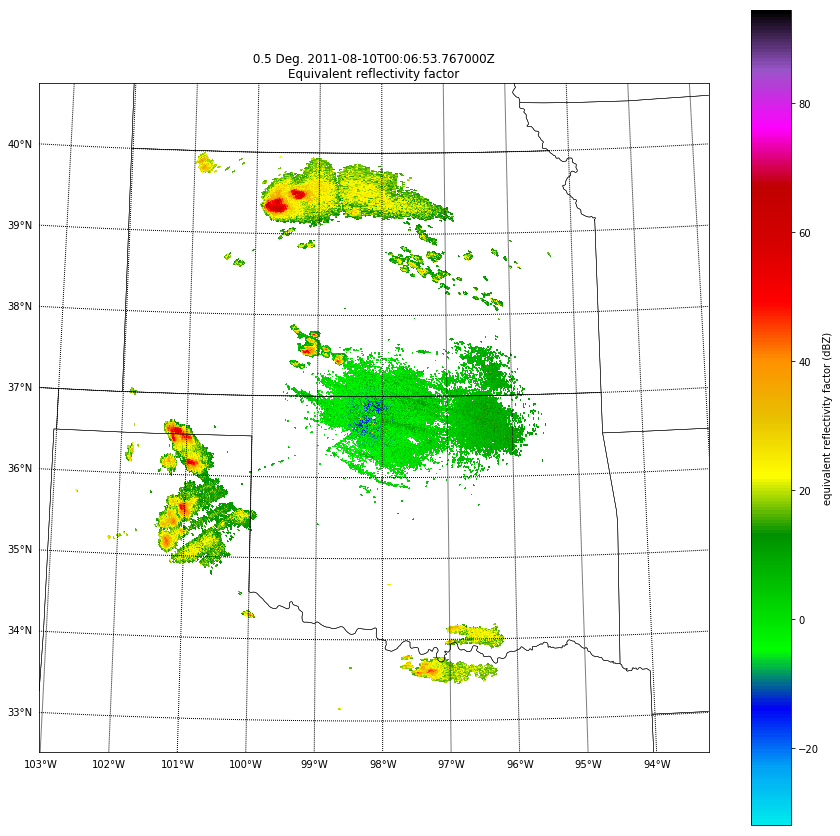

In [6]:
display = pyart.graph.RadarMapDisplay(raw)
display.plot_ppi_map('reflectivity')

### Part 2: NEXRAD Level-III Products

In [7]:
# read level 3 data
# Base Reflectivity
N0Z = pyart.io.read('data/KVNX_20110810/KOUN_SDUS74_N0ZVNX_201108100006')

In [8]:
# check the metadata
N0Z.info('compact')

altitude: <ndarray of type: float64 and shape: (1,)>
altitude_agl: None
antenna_transition: None
azimuth: <ndarray of type: float32 and shape: (360,)>
elevation: <ndarray of type: float32 and shape: (360,)>
fields:
	reflectivity: <ndarray of type: float32 and shape: (360, 230)>
fixed_angle: <ndarray of type: float32 and shape: (1,)>
instrument_parameters: None
latitude: <ndarray of type: float64 and shape: (1,)>
longitude: <ndarray of type: float64 and shape: (1,)>
nsweeps: 1
ngates: 230
nrays: 360
radar_calibration: None
range: <ndarray of type: float32 and shape: (230,)>
scan_rate: None
scan_type: ppi
sweep_end_ray_index: <ndarray of type: int32 and shape: (1,)>
sweep_mode: <ndarray of type: |S20 and shape: (1,)>
sweep_number: <ndarray of type: int32 and shape: (1,)>
sweep_start_ray_index: <ndarray of type: int32 and shape: (1,)>
target_scan_rate: None
time: <ndarray of type: float64 and shape: (360,)>
metadata:
	Conventions: CF/Radial instrument_parameters
	version: 1.3
	title: 
	in

In [9]:
# fixed angle
N0Z.fixed_angle

{'long_name': 'Target angle for sweep',
 'units': 'degrees',
 'standard_name': 'target_fixed_angle',
 'data': array([ 0.5], dtype=float32)}

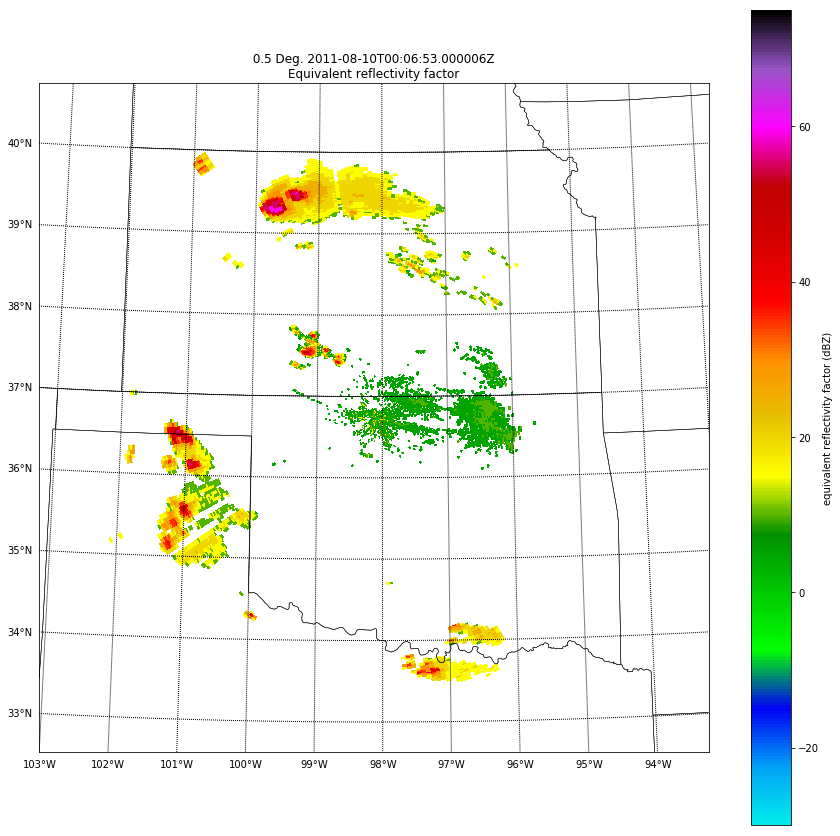

In [10]:
display = pyart.graph.RadarMapDisplay(N0Z)
display.plot_ppi_map('reflectivity')

In [11]:
# radar = pyart.io.read_nexrad_level3('data/KVNX_20110810/KOUN_SDUS84_N1XVNX_201108100300')

# Differential Reflectivity (approx. elev. angle: 1.5 deg)
N3X = pyart.io.read('data/KVNX_20110810/KOUN_SDUS84_N3XVNX_201108100006')

# Correlation Coefficient (approx. elev. angle: 1.5 deg) 
N3C = pyart.io.read('data/KVNX_20110810/KOUN_SDUS84_N3CVNX_201108100006')

# Specific Differential Phase (approx. elev.: 1.5 deg)
N3K = pyart.io.read('data/KVNX_20110810/KOUN_SDUS84_N3KVNX_201108100006')

# Hydrometeor Classification (approx. elev.: 1.5 deg) 
N3H = pyart.io.read('data/KVNX_20110810/KOUN_SDUS84_N3HVNX_201108100006')

In [12]:
# check the metadata of N3X
N3X.info('compact')

altitude: <ndarray of type: float64 and shape: (1,)>
altitude_agl: None
antenna_transition: None
azimuth: <ndarray of type: float32 and shape: (360,)>
elevation: <ndarray of type: float32 and shape: (360,)>
fields:
	differential_reflectivity: <ndarray of type: float32 and shape: (360, 1112)>
fixed_angle: <ndarray of type: float32 and shape: (1,)>
instrument_parameters: None
latitude: <ndarray of type: float64 and shape: (1,)>
longitude: <ndarray of type: float64 and shape: (1,)>
nsweeps: 1
ngates: 1112
nrays: 360
radar_calibration: None
range: <ndarray of type: float32 and shape: (1112,)>
scan_rate: None
scan_type: ppi
sweep_end_ray_index: <ndarray of type: int32 and shape: (1,)>
sweep_mode: <ndarray of type: |S20 and shape: (1,)>
sweep_number: <ndarray of type: int32 and shape: (1,)>
sweep_start_ray_index: <ndarray of type: int32 and shape: (1,)>
target_scan_rate: None
time: <ndarray of type: float64 and shape: (360,)>
metadata:
	Conventions: CF/Radial instrument_parameters
	version: 

In [13]:
# check the metadata of N3C
N3C.info('compact')

altitude: <ndarray of type: float64 and shape: (1,)>
altitude_agl: None
antenna_transition: None
azimuth: <ndarray of type: float32 and shape: (360,)>
elevation: <ndarray of type: float32 and shape: (360,)>
fields:
	cross_correlation_ratio: <ndarray of type: float32 and shape: (360, 1112)>
fixed_angle: <ndarray of type: float32 and shape: (1,)>
instrument_parameters: None
latitude: <ndarray of type: float64 and shape: (1,)>
longitude: <ndarray of type: float64 and shape: (1,)>
nsweeps: 1
ngates: 1112
nrays: 360
radar_calibration: None
range: <ndarray of type: float32 and shape: (1112,)>
scan_rate: None
scan_type: ppi
sweep_end_ray_index: <ndarray of type: int32 and shape: (1,)>
sweep_mode: <ndarray of type: |S20 and shape: (1,)>
sweep_number: <ndarray of type: int32 and shape: (1,)>
sweep_start_ray_index: <ndarray of type: int32 and shape: (1,)>
target_scan_rate: None
time: <ndarray of type: float64 and shape: (360,)>
metadata:
	Conventions: CF/Radial instrument_parameters
	version: 1.

In [14]:
# check the metadata of N3K
N3K.info('compact')

altitude: <ndarray of type: float64 and shape: (1,)>
altitude_agl: None
antenna_transition: None
azimuth: <ndarray of type: float32 and shape: (360,)>
elevation: <ndarray of type: float32 and shape: (360,)>
fields:
	specific_differential_phase: <ndarray of type: float32 and shape: (360, 1112)>
fixed_angle: <ndarray of type: float32 and shape: (1,)>
instrument_parameters: None
latitude: <ndarray of type: float64 and shape: (1,)>
longitude: <ndarray of type: float64 and shape: (1,)>
nsweeps: 1
ngates: 1112
nrays: 360
radar_calibration: None
range: <ndarray of type: float32 and shape: (1112,)>
scan_rate: None
scan_type: ppi
sweep_end_ray_index: <ndarray of type: int32 and shape: (1,)>
sweep_mode: <ndarray of type: |S20 and shape: (1,)>
sweep_number: <ndarray of type: int32 and shape: (1,)>
sweep_start_ray_index: <ndarray of type: int32 and shape: (1,)>
target_scan_rate: None
time: <ndarray of type: float64 and shape: (360,)>
metadata:
	Conventions: CF/Radial instrument_parameters
	version

In [15]:
# check the metadata of N3H
N3H.info('compact')

altitude: <ndarray of type: float64 and shape: (1,)>
altitude_agl: None
antenna_transition: None
azimuth: <ndarray of type: float32 and shape: (360,)>
elevation: <ndarray of type: float32 and shape: (360,)>
fields:
	radar_echo_classification: <ndarray of type: float32 and shape: (360, 1112)>
fixed_angle: <ndarray of type: float32 and shape: (1,)>
instrument_parameters: None
latitude: <ndarray of type: float64 and shape: (1,)>
longitude: <ndarray of type: float64 and shape: (1,)>
nsweeps: 1
ngates: 1112
nrays: 360
radar_calibration: None
range: <ndarray of type: float32 and shape: (1112,)>
scan_rate: None
scan_type: ppi
sweep_end_ray_index: <ndarray of type: int32 and shape: (1,)>
sweep_mode: <ndarray of type: |S20 and shape: (1,)>
sweep_number: <ndarray of type: int32 and shape: (1,)>
sweep_start_ray_index: <ndarray of type: int32 and shape: (1,)>
target_scan_rate: None
time: <ndarray of type: float64 and shape: (360,)>
metadata:
	Conventions: CF/Radial instrument_parameters
	version: 

In [16]:
# fixed angle of N3X
N3X.fixed_angle

{'long_name': 'Target angle for sweep',
 'units': 'degrees',
 'standard_name': 'target_fixed_angle',
 'data': array([ 3.4000001], dtype=float32)}

In [17]:
# fixed angle of N3H
N3H.fixed_angle

{'long_name': 'Target angle for sweep',
 'units': 'degrees',
 'standard_name': 'target_fixed_angle',
 'data': array([ 3.4000001], dtype=float32)}

[0.0625 -0.25 -0.5 ..., 0.0 1.9375 2.0625]


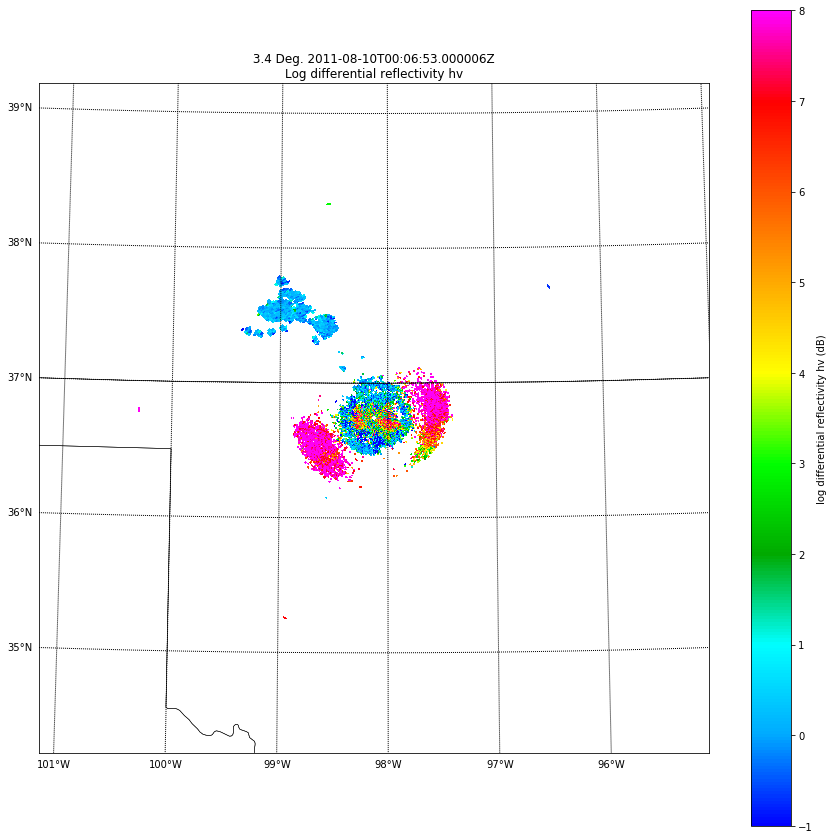

In [18]:
# Differential reflectivity
x = N3X.fields['differential_reflectivity']['data']
y = x[~x.mask]
print(y)

display = pyart.graph.RadarMapDisplay(N3X)
display.plot_ppi_map('differential_reflectivity')

[0.9183333516120911 0.9316666722297668 0.9449999928474426 ...,
 0.4283333420753479 0.43833333253860474 0.5183333158493042]


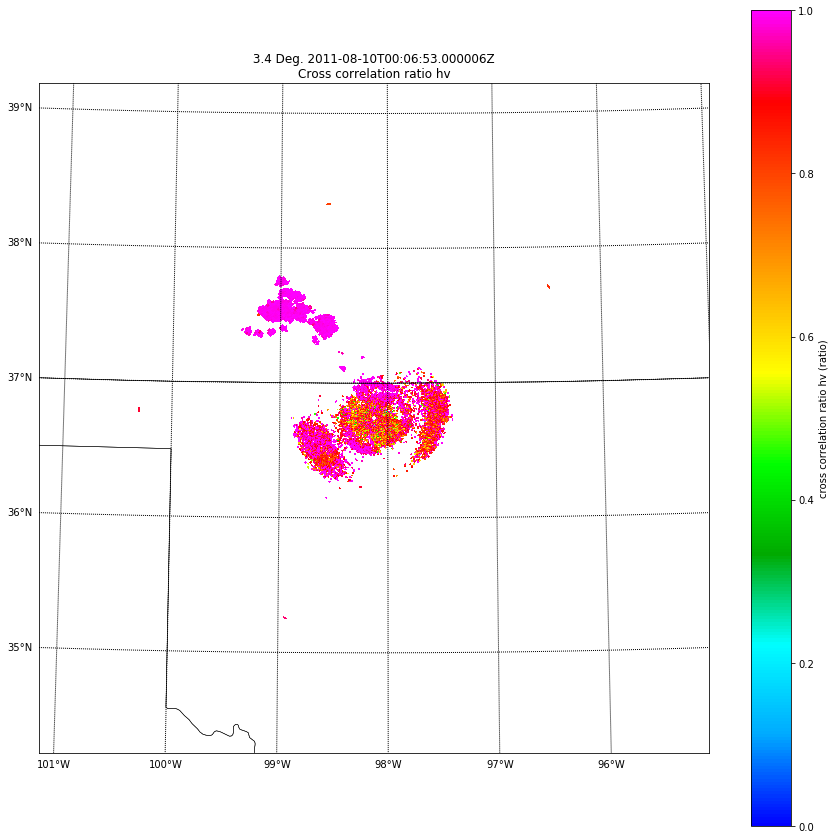

In [19]:
# Correlation Coefficient (RHOHV)
x = N3C.fields['cross_correlation_ratio']['data']
y = x[~x.mask]
print(y)

display = pyart.graph.RadarMapDisplay(N3C)
display.plot_ppi_map('cross_correlation_ratio')

[0.0 0.0 0.0 ..., 0.0 0.0 0.0]


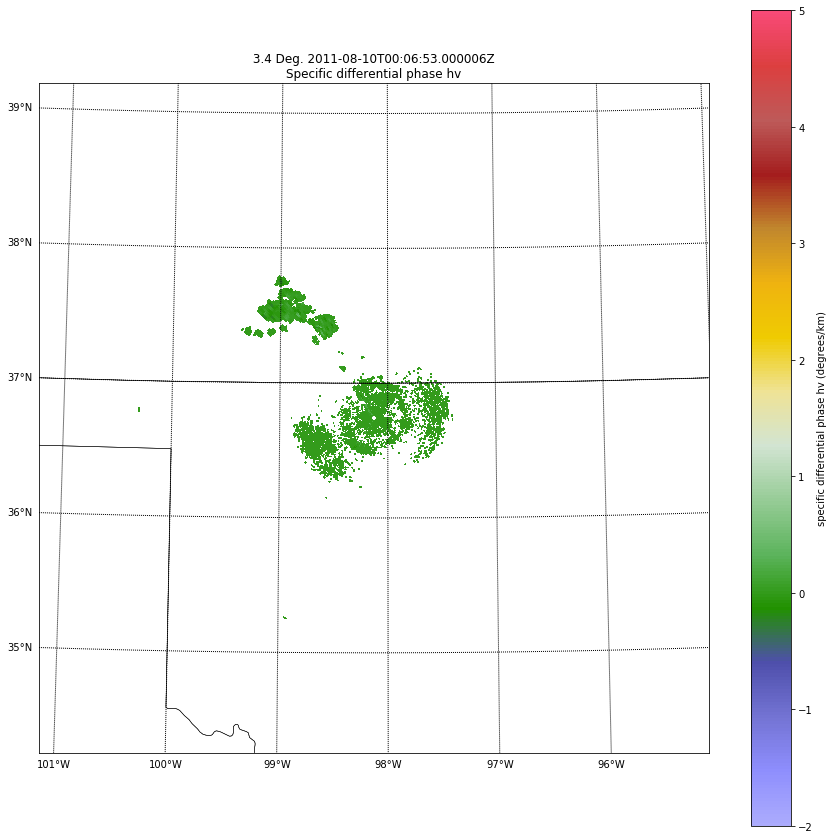

In [20]:
# Specific differential phase (KDP)
x = N3K.fields['specific_differential_phase']['data']
y = x[~x.mask]
print(y)

display = pyart.graph.RadarMapDisplay(N3K)
display.plot_ppi_map('specific_differential_phase')

[140.0 140.0 60.0 ..., 140.0 10.0 10.0]


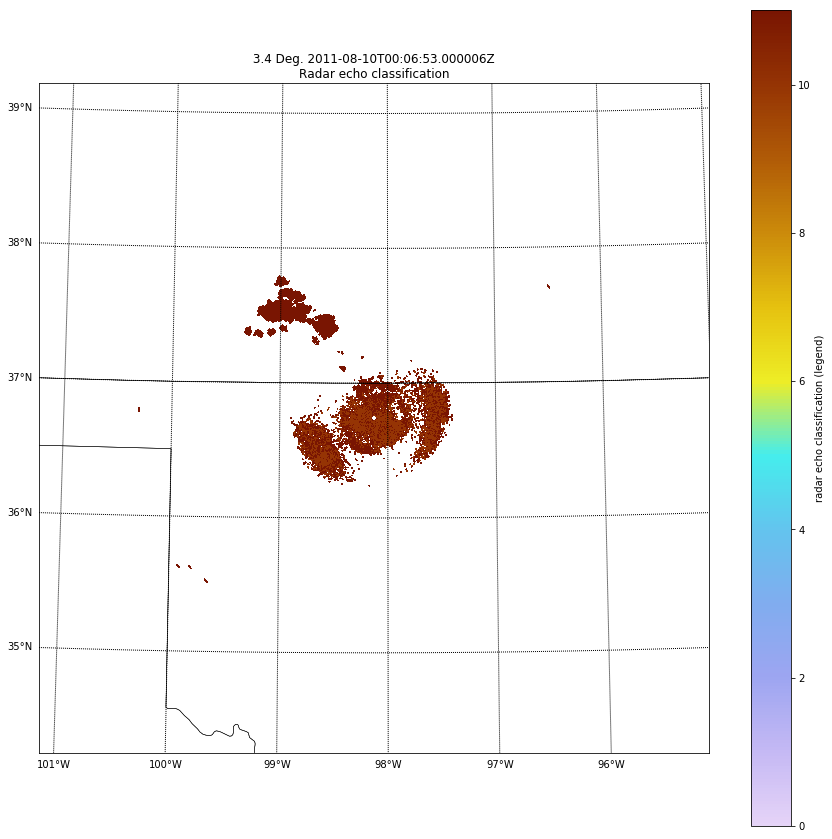

In [21]:
# Radar echo classification
x = N3H.fields['radar_echo_classification']['data']
y = x[~x.mask]
print(y)

display = pyart.graph.RadarMapDisplay(N3H)
display.plot_ppi_map('radar_echo_classification')

### Part 3: ARM CSAPR Data

In [22]:
radar = pyart.io.read('data/110635.mdv')

In [23]:
radar.info('compact')

altitude: <ndarray of type: float64 and shape: (1,)>
altitude_agl: None
antenna_transition: None
azimuth: <ndarray of type: float64 and shape: (6120,)>
elevation: <ndarray of type: float64 and shape: (6120,)>
fields:
	velocity: <ndarray of type: float32 and shape: (6120, 983)>
	specific_differential_phase: <ndarray of type: float32 and shape: (6120, 983)>
	normalized_coherent_power: <ndarray of type: float32 and shape: (6120, 983)>
	differential_reflectivity: <ndarray of type: float32 and shape: (6120, 983)>
	reflectivity: <ndarray of type: float32 and shape: (6120, 983)>
	spectrum_width: <ndarray of type: float32 and shape: (6120, 983)>
	differential_phase: <ndarray of type: float32 and shape: (6120, 983)>
	cross_correlation_ratio: <ndarray of type: float32 and shape: (6120, 983)>
fixed_angle: <ndarray of type: float32 and shape: (17,)>
instrument_parameters:
	prt_mode: <ndarray of type: |S5 and shape: (17,)>
	prt: <ndarray of type: float32 and shape: (6120,)>
	unambiguous_range: <nda

In [24]:
radar.fixed_angle

{'long_name': 'Target angle for sweep',
 'units': 'degrees',
 'standard_name': 'target_fixed_angle',
 'data': array([  0.75      ,   1.20000005,   1.89999998,   2.5999999 ,
          3.5       ,   4.4000001 ,   5.30000019,   6.4000001 ,
          7.80000019,   9.60000038,  11.69999981,  14.30000019,
         17.5       ,  21.39999962,  26.10000038,  33.        ,  42.        ], dtype=float32)}

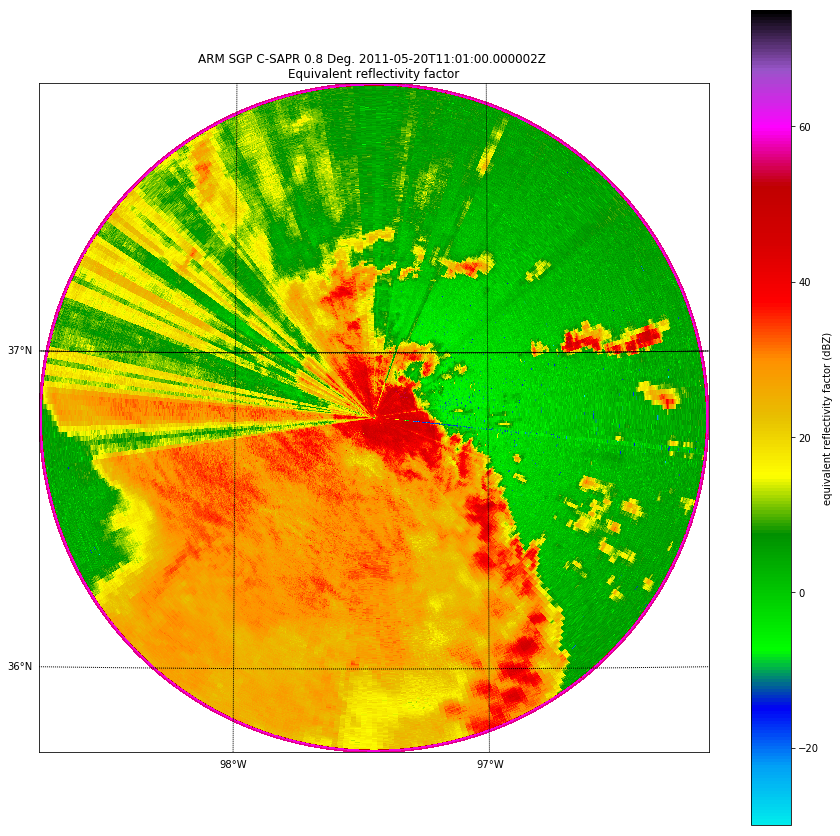

In [25]:
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map('reflectivity')